Welcome to my 2x2 factorial anova program.

What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA
Enter 7 to end the program

6
Performing ANOVA
                   Anova
             F Value Num DF  Den DF  Pr > F
-------------------------------------------
Prime         0.3132 1.0000 147.0000 0.5766
Target        0.2365 1.0000 147.0000 0.6275
Prime:Target 17.1778 1.0000 147.0000 0.0001

Would you like to carry out pairwise comparisons? y/n
(Note these are only recommended when there is a significant interaction between Prime and Target)y

Performing pairwise comparisons:       
            
t-test result for Positive Targets in Positive and Negative Primes:
Ttest_relResult(statistic=-2.906391854871503, pvalue=0.00422249196356647)


t-test result for Negative Targets in Positive and Negative Primes:
Ttest_relRes

,Participant,Prime,Target,Reaction Time
0,1,Positive,Positive,1502
1,2,Positive,Positive,1535
2,3,Positive,Positive,1563
3,4,Positive,Positive,1492
4,5,Positive,Positive,1560
...,...,...,...,...
587,144,Negative,Negative,1474
588,145,Negative,Negative,1535
589,146,Negative,Negative,1575
590,147,Negative,Negative,1505



What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA
Enter 7 to end the program

4
Displaying summary statistics


Reaction Time                                           \
                          count         mean        std     min      25%   
Prime    Target                                                            
Negative Negative         148.0  1547.256757  52.382700  1417.0  1507.50   
         Positive         148.0  1562.648649  50.468400  1440.0  1533.25   
Positive Negative         148.0  1566.959459  54.016737  1448.0  1528.50   
         Positive         148.0  1547.391892  44.879072  1430.0  1513.00   

                                            
                      50%      75%     max  
Prime    Target                             
Negative Negative  1550.5  1580.50  1710.0  
         Positive  1562.0  1587.00  1736.0  
Positive Negative  1570.5  1602.25  1694.0  
         Positive  1550.5  1584.25  1637.0


What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA
Enter 7 to end the program

5

What visualisation would you like to generate?
Enter 1 for a bar chart
Enter 2 for an interaction plot
Enter 3 to go back
            
            2


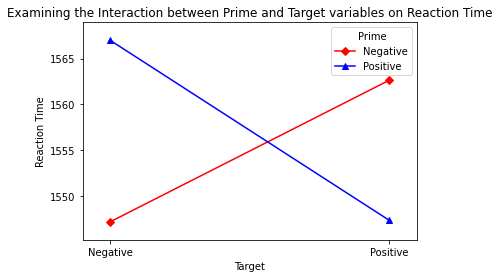

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from statsmodels.stats.anova import AnovaRM
print('Welcome to my 2x2 factorial anova program.')
def anova_function():
    global data
    options = input('''
What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA
Enter 7 to end the program

''')
    if options == '1':
        substring = '.csv'
        def load_data_function():
            global participant
            global data
            global IV1
            global IV2
            global DV
            global grouped_data
            global grouped_means
            global grouped_errors
            file = input('''
Enter your csv type file name or enter 'b' to go back. 
Please ensure that data is in long format before entering: 

        ''')
            if substring in file:
                print('csv type file loaded in.')
                data = pd.read_csv(file)
                mapping = {data.columns[0]: 'Participant'}
                data = data.rename(columns=mapping)
                participant = data.columns[0]
                IV1 = data.columns[1]
                IV2 = data.columns[2]
                DV = data.columns[3]
                grouped_data = data.groupby([IV1,IV2])
                grouped_means = grouped_data[DV].mean()
                grouped_errors = grouped_data[DV].std()
            elif file == 'b':
                anova_function()
            else:
                print('Invalid option. Try again.')
                load_data_function_again()
        def load_data_function_again():
            load_data_function()
        load_data_function()        
    elif options == '2':
        print('Displaying Data Frame')
        display(data)
    elif options == '3':
        def tidy_data_function():
            global data
            global participant
            global IV1
            global IV2
            global DV
            global grouped_data
            global grouped_means
            global grouped_errors
            columns_levels = input('''
What would you like to tidy?
Enter 1 to rename the columns
Enter 2 to rename the levels
Enter 3 to go back

        ''')
            if columns_levels == '1':
                IV1 = input('''
Enter your first independent variable: 

            ''')
                IV2 = input('''
Enter your second independent variable: 

            ''')
                DV = input('''
Enter your dependent variable: 
            
            ''')
                mapping = {data.columns[1]: IV1, data.columns[2]: IV2, data.columns[3]: DV}
                data = data.rename(columns=mapping)
                grouped_data = data.groupby([IV1,IV2])
                grouped_means = grouped_data[DV].mean()
                grouped_errors = grouped_data[DV].std()
            elif columns_levels == '2':
                def levels_rename():
                    global data
                    global grouped_data
                    global grouped_means
                    global grouped_errors
                    level_origin = input('''
What would you like to rename: 

                ''')
                    level_change = input('''
What would you like to rename it to: 

                ''')
                    data = data.replace([level_origin],[level_change])
                    grouped_data = data.groupby([IV1,IV2])
                    grouped_means = grouped_data[DV].mean()
                    grouped_errors = grouped_data[DV].std()

                    levels_rename_again()

                def levels_rename_again():
                    global data
                    change_levels = input('''
Would you like to rename another level? y/n: 

            ''')
                    if change_levels == 'y':
                        levels_rename()
                    elif change_levels == 'n':
                        anova_function()
                    else:
                        levels_rename_again()        
                levels_rename()
            elif columns_levels == '3':
                anova_function()
            else:
                print('Invalid choice. Try again')
                tidy_data_function_again()
        def tidy_data_function_again():
            tidy_data_function()
        tidy_data_function()
    elif options == '4':
        print ('Displaying summary statistics')
        display(data[[IV1, IV2, DV]].groupby([IV1,IV2]).describe())
    elif options == '5':
        def visualisations_function():
            diff_visualisations = input('''
What visualisation would you like to generate?
Enter 1 for a bar chart
Enter 2 for an interaction plot
Enter 3 to go back
            
            ''')
            if diff_visualisations == '1':
                grouped_means.plot(kind='bar', yerr=grouped_errors, alpha=0.5, capsize=10)
                plt.xlabel(IV1 + ' x ' + IV2)
                plt.ylabel(DV)
                plt.xticks(rotation=45)
                plt.title('Examining the effect of ' + IV1 + ' and ' + IV2 + ' variables on ' + DV)
                plt.show()
            elif diff_visualisations == '2':
                data_to_plot = pd.DataFrame(grouped_means).reset_index()
                interaction_plot(x=data_to_plot[IV2], trace=data_to_plot[IV1],
                                response=data_to_plot[DV], colors=['red', 'blue'],
                                markers=['D', '^'])
                plt.xlabel(IV2)
                plt.ylabel(DV)
                plt.title('Examining the Interaction between ' + IV1 + ' and ' + IV2 + ' variables on ' + DV)
                plt.show()
            elif diff_visualisations == '3':
                anova_function()
            visualisations_function_again()
        def visualisations_function_again():
            visualisations_function()   
        visualisations_function()  
    elif options == '6':
        print('Performing ANOVA')
        print(AnovaRM(data=data, depvar=DV, within=[IV1,IV2], subject=participant).fit())
        pairwise_comp = input(
'Would you like to carry out pairwise comparisons? y/n\n(Note these are only recommended when there is a significant interaction between ' + IV1 + ' and ' + IV2 + ')')
        if pairwise_comp == 'y':
            print('''
Performing pairwise comparisons:       
            ''')
            print('t-test result for Positive ' + IV2 + 's in Positive and Negative ' + IV1 + 's:')
            index = (data[IV1]=='Positive') & (data[IV2]=='Positive')
            PP = data[index][DV]
            index = (data[IV1]=='Negative') & (data[IV2]=='Positive')
            NP = data[index][DV]
            print(stats.ttest_rel(PP, NP))
            print('''
''')
            print('t-test result for Negative ' + IV2 + 's in Positive and Negative ' + IV1 + 's:')
            index = (data[IV1]=='Positive') & (data[IV2]=='Negative')
            PN = data[index][DV] 
            index = (data[IV1]=='Negative') & (data[IV2]=='Negative')
            NN = data[index][DV]
            print(stats.ttest_rel(PN, NN))
        elif pairwise_comp == 'n':
            anova_function()
    elif options == '7':
        print('Program terminating')
        quit()
    else:
        print('Invalid choice. Please try again.')
    anova_function_again()

def anova_function_again():
    anova_function()
    
anova_function()